In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [34]:
df_mobile_prices = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
y_price_range = df_mobile_prices['price_range']
df_mobile_prices = df_mobile_prices.drop('price_range',axis=1)
df_mobile_prices

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [35]:
y_price_range

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

# Calcular a Matriz de Covariância do Dataset

In [36]:
cov_matriz = df_mobile_prices.cov()

In [37]:
cov_matriz

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
battery_power,193088.359838,2.472579,4.116922,-9.194773,63.592320,3.439322,-31.923572,4.319702,28.689738,-29.885322,83.782186,2905.736870,-1595.644609,-3.112180e+02,-55.464653,-41.005692,126.075334,2.158241,-2.310961,-1.833296
blue,2.472579,0.250100,0.008741,0.008802,0.007801,0.003359,0.373669,0.000584,-0.152331,0.041373,-0.030183,-1.525223,-8.977161,1.429471e+01,-0.006221,0.001336,0.038074,-0.006446,0.002516,-0.005468
clock_speed,4.116922,0.008741,0.665863,-0.000537,-0.001537,-0.017562,0.096914,-0.003381,0.356738,-0.010686,-0.025955,-5.259133,-3.341841,3.047585e+00,-0.099970,-0.026229,-0.050970,-0.016151,0.008062,-0.009986
dual_sim,-9.194773,0.008802,-0.000537,0.250035,-0.063222,0.000796,-0.142263,-0.003193,-0.158945,-0.028209,-0.051983,-4.632342,3.088397,2.227762e+01,-0.025174,-0.036305,-0.107658,-0.002986,-0.004281,0.005686
fc,63.592320,0.007801,-0.001537,-0.063222,18.848134,-0.035922,-2.295039,-0.002243,3.629749,-0.132661,16.970829,-19.247050,-9.711403,7.110563e+01,-0.201462,-0.234004,-0.161985,0.003317,-0.032195,0.043605
four_g,3.439322,0.003359,-0.017562,0.000796,-0.035922,0.249663,0.078790,-0.000263,-0.292500,-0.033958,-0.016963,-4.265455,1.608471,3.963902e+00,0.057189,0.080550,-0.127300,0.124440,0.004188,-0.004403
int_memory,-31.923572,0.373669,0.096914,-0.142263,-2.295039,0.078790,329.266971,0.036037,-21.977567,-1.175291,-3.661448,84.080518,-65.366654,6.458695e+02,2.887692,0.927298,-0.276650,-0.072446,-0.245012,0.063456
m_dep,4.319702,0.000584,-0.003381,-0.003193,-0.002243,-0.000263,0.036037,0.083184,0.222125,-0.002312,0.045969,3.233478,2.937617,-2.951498e+00,-0.030802,-0.023104,0.026794,-0.001483,-0.000380,-0.004089
mobile_wt,28.689738,-0.152331,0.356738,-0.158945,3.629749,-0.292500,-21.977567,0.222125,1253.135567,-1.537873,4.045314,14.756486,1.373327,-9.909058e+01,-5.049343,-3.201584,1.200861,0.023398,-0.254374,-0.007247
n_cores,-29.885322,0.041373,-0.010686,-0.028209,-0.132661,-0.033958,-1.175291,-0.002312,-1.537873,5.234197,-0.016547,-6.977203,24.205785,1.208167e+01,-0.003035,0.257405,0.164357,-0.014368,0.027202,-0.011399


# Calcular os autovalores e autovetores:

In [38]:
autovalores, autovetores = np.linalg.eig(cov_matriz)

In [39]:
pd.DataFrame(autovalores)

,0
0,1.176743e+06
1,1.931781e+05
2,2.899194e+05
3,9.363010e+04
4,1.253700e+03
5,3.283495e+02
6,4.682288e+01
7,2.991329e+01
8,2.732790e+01
9,9.155218e+00


In [40]:
pd.DataFrame(autovetores)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000347,0.999442,-0.010388,-3.171326e-02,-0.000157,-0.000192,0.000562,-0.000713,0.000184,-0.000096,0.000033,0.000154,0.000019,-0.000019,0.000007,0.000028,-0.000035,0.000020,0.000028,0.000003
1,-0.000012,0.000014,0.000025,5.856317e-05,-0.000128,-0.001087,0.000378,0.001294,0.000087,0.002006,-0.001794,0.008930,-0.020914,0.005317,0.042447,-0.001467,0.562971,0.708943,-0.215245,-0.363006
2,-0.000003,0.000021,0.000021,-1.396164e-05,0.000283,-0.000323,0.000583,-0.001137,-0.003497,0.006207,0.001643,-0.002223,-0.996589,0.007212,0.001388,-0.070942,0.005930,-0.011324,0.020131,0.033084
3,-0.000019,-0.000048,0.000004,-5.306232e-05,-0.000121,0.000465,0.001722,-0.002982,-0.002654,-0.002478,0.002256,-0.006254,0.001343,0.020247,0.011500,0.028885,-0.595919,0.696633,0.302352,0.258300
4,-0.000061,0.000329,0.000067,-8.234839e-05,0.003029,0.007899,-0.515805,-0.024368,0.001125,0.370909,-0.771300,0.027479,0.000790,0.001721,-0.002327,-0.002171,-0.005478,0.001075,-0.000729,-0.000357
5,-0.000003,0.000017,0.000007,-4.465700e-05,-0.000235,-0.000234,0.000839,-0.005072,0.002387,-0.000079,0.002923,-0.007226,0.055760,-0.142333,-0.589220,-0.790185,0.022362,0.045263,0.004973,0.048919
6,-0.000548,-0.000147,-0.000068,1.190878e-03,-0.023736,-0.999553,-0.015246,0.002394,-0.007230,0.004442,0.002049,0.003536,0.000360,-0.000074,0.000283,-0.000016,-0.001235,-0.000513,0.000505,-0.000112
7,0.000003,0.000022,-0.000015,-6.542333e-07,0.000176,-0.000129,-0.000803,0.001077,-0.001096,-0.000496,0.003136,-0.000440,0.005711,0.970338,-0.239749,0.003356,0.002261,-0.007269,-0.027918,-0.008326
8,0.000084,0.000150,-0.000039,8.096726e-05,0.999694,-0.023840,0.004246,-0.001924,0.004160,-0.001390,0.000288,0.001281,0.000273,-0.000198,-0.000097,-0.000149,-0.000096,0.000155,0.000089,-0.000188
9,-0.000010,-0.000159,-0.000039,-2.275484e-04,-0.001205,0.003702,0.002183,0.005331,0.009769,0.028690,0.047837,0.998264,-0.001106,0.000037,-0.002142,-0.007026,-0.005802,-0.001324,0.004303,0.010199


# Selecionar Os Dois Maiores Autovalores e Calcular A Variância Explicada 

In [41]:
pares_autos = [
    (
        np.abs(autovalores[i]),
        autovetores[:,i]
    ) for i in range (len(autovalores))
]
pares_autos.sort()
pares_autos.reverse()
total = sum(autovalores)
var_exp = [
    (i/total)*100 for i in sorted(autovalores, reverse=True)
]
cum_var_exp = np.cumsum(var_exp)

In [42]:
df_temp = pd.DataFrame(
    {'autovalores': autovalores,
     'cum_var_exp': cum_var_exp,
     'var_esp': var_exp})
print(df_temp)
print('\nAuto-vetores')
for autovetor in [p[1] for p in pares_autos]:
    print(autovetor)

     autovalores  cum_var_exp    var_esp
0   1.176743e+06    67.043941  67.043941
1   1.931781e+05    83.561854  16.517913
2   2.899194e+05    94.568014  11.006160
3   9.363010e+04    99.902510   5.334496
4   1.253700e+03    99.973938   0.071429
5   3.283495e+02    99.992646   0.018707
6   4.682288e+01    99.995313   0.002668
7   2.991329e+01    99.997018   0.001704
8   2.732790e+01    99.998575   0.001557
9   9.155218e+00    99.999096   0.000522
10  8.489138e+00    99.999580   0.000484
11  5.204934e+00    99.999876   0.000297
12  6.671008e-01    99.999914   0.000038
13  8.238436e-02    99.999934   0.000019
14  8.632131e-02    99.999948   0.000015
15  3.411977e-01    99.999963   0.000014
16  2.325577e-01    99.999977   0.000014
17  2.579842e-01    99.999990   0.000013
18  2.529622e-01    99.999995   0.000005
19  2.497154e-01   100.000000   0.000005

Auto-vetores
[ 3.47198014e-04 -1.21520201e-05 -2.63002912e-06 -1.89748044e-05
 -6.05599727e-05 -3.40463135e-06 -5.48237530e-04  2.53414241

# Transformar o Dataset com Os Dois Maiores Autovalores 

In [43]:
n_componentes = 2
autovetores = [p[1] for p in pares_autos]
A = autovetores[0:n_componentes]
X = np.dot(df_mobile_prices,np.array(A).T)
novo_df_mobile_prices = pd.DataFrame(X, columns=['pc1','pc2'])
novo_df_mobile_prices['price_range'] = y_price_range

In [44]:
novo_df_mobile_prices

,pc1,pc2,price_range
0,-2549.103138,-560.461995,1
1,-2623.490779,-2052.872594,2
2,-2591.835872,-2120.192363,2
3,-2758.328368,-2135.941407,2
4,-1399.520860,-1738.554752,1
...,...,...,...
1995,-657.409877,-2200.063364,0
1996,-2024.060277,-2050.188032,2
1997,-3049.175309,-1792.921678,3
1998,-865.768428,-726.366114,0


# Plotando O Dataset Com as Colunas Correspondentes Aos Autovalores Selecionados

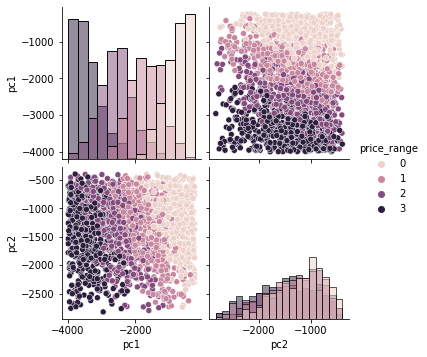

In [45]:
sns.pairplot(
    novo_df_mobile_prices, vars=['pc1','pc2'],
    hue='price_range',diag_kind="hist")
plt.show()

# Testando o PCA com A Biblioteca do Scikit-learn

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=2)
pca.fit(df_mobile_prices)

PCA(n_components=2)

In [48]:
pca.explained_variance_

array([1176743.02818646,  289919.39382938])

In [49]:
pca.components_

array([[-3.47198014e-04,  1.21520201e-05,  2.63002912e-06,
         1.89748044e-05,  6.05599727e-05,  3.40463135e-06,
         5.48237530e-04, -2.53414241e-06, -8.44348497e-05,
         1.03535536e-05,  1.62420234e-04, -9.90307368e-03,
         9.64775480e-04,  9.99950255e-01,  6.12371435e-05,
         1.42225196e-04,  5.46886920e-05,  6.25520198e-06,
        -1.40798358e-05,  1.03583891e-05],
       [ 1.03884008e-02, -2.47262901e-05, -2.08735861e-05,
        -4.07785366e-06, -6.73320865e-05, -6.63424002e-06,
         6.84761004e-05,  1.51519879e-05,  3.91158305e-05,
         3.92449910e-05, -9.08839471e-05,  7.25036150e-01,
         6.88601381e-01,  6.51958268e-03,  3.71862755e-04,
         3.65603493e-04, -2.09044988e-05, -1.43530108e-05,
         1.08600905e-05,  4.45371034e-05]])

In [50]:
pca.explained_variance_ratio_

array([0.67043941, 0.16517913])

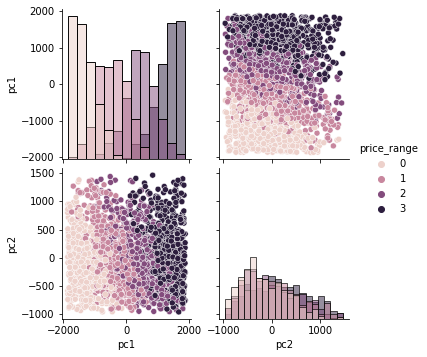

In [51]:
X = pca.transform(df_mobile_prices)
novo_df_mobile_prices = pd.DataFrame(X, columns=['pc1','pc2'])
novo_df_mobile_prices['price_range'] = y_price_range
sns.pairplot(
    novo_df_mobile_prices, vars=['pc1','pc2'],
    hue='price_range',diag_kind="hist")
plt.show()